In [3]:
import networkx
import numpy
from matplotlib import pyplot
import pandas
import collections

In [4]:
easy_install spotify

SyntaxError: invalid syntax (<ipython-input-4-95de4c86d1e9>, line 1)

Descriptive statistics. Use summary functions like mean and standard
deviation along with visual displays like scatter plots and histograms to
describe data.

In [82]:
songs = pandas.read_csv("top2018.csv")
songs.describe()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
mean,0.71646,0.659060,5.330000,-5.677640,0.590000,0.115569,0.195701,0.001584,0.158302,0.484443,119.904180,205206.780000,3.98
std,0.13107,0.145067,3.676447,1.777577,0.494311,0.104527,0.220946,0.013449,0.111662,0.206145,28.795984,40007.893404,0.20
min,0.25800,0.296000,0.000000,-10.109000,0.000000,0.023200,0.000282,0.000000,0.021500,0.079600,64.934000,95467.000000,3.00
25%,0.63550,0.562000,1.750000,-6.650500,0.000000,0.045350,0.040225,0.000000,0.094675,0.341000,95.730750,184680.000000,4.00
50%,0.73300,0.678000,5.000000,-5.566500,1.000000,0.074950,0.109000,0.000000,0.118500,0.470500,120.116000,205047.500000,4.00
75%,0.79825,0.772250,8.250000,-4.363750,1.000000,0.137000,0.247750,0.000031,0.170750,0.641500,140.022750,221493.250000,4.00
max,0.96400,0.909000,11.000000,-2.384000,1.000000,0.530000,0.934000,0.134000,0.636000,0.931000,198.075000,417920.000000,5.00


In [83]:
songs.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7,-9.211,1,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973,4
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8,-4.880,1,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606,4
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5,-6.090,0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147,4
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8,-8.011,1,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440,4
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1,-5.833,1,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925,4


In [84]:
#data column
songs.artists

0                   Drake
1            XXXTENTACION
2             Post Malone
3             Post Malone
4                   Drake
5             Post Malone
6                 Cardi B
7           Calvin Harris
8                Dua Lipa
9              Marshmello
10         Camila Cabello
11             Juice WRLD
12                  Drake
13               Maroon 5
14                   Zedd
15         Kendrick Lamar
16          Ariana Grande
17              Nicky Jam
18           XXXTENTACION
19             BlocBoy JB
20             Rudimental
21             Nio Garcia
22                  Bazzi
23    5 Seconds of Summer
24               Dua Lipa
25             Ed Sheeran
26                 Khalid
27             Bebe Rexha
28           XXXTENTACION
29             Ed Sheeran
             ...         
70       Hailee Steinfeld
71      Portugal. The Man
72             The Weeknd
73                  Migos
74                 G-Eazy
75            Post Malone
76            Post Malone
77          

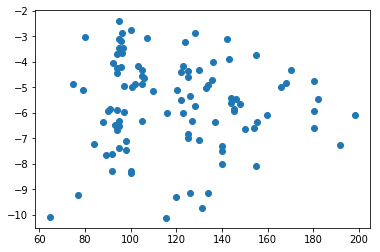

In [85]:
##Search for any meaninful relationships

pyplot.scatter(songs.tempo, songs.loudness)
pyplot.show()

In [86]:
##if a relationship appears significant



In [87]:
##Reducing insignificent data


In [88]:
## What variables correlate
## We think these variables might have a correlation, are we right?

# once we correlate 2 variables we will see if there is a correlations with the artists
# we will track furthers songs (2019) that this artist has 

Models showing patterns or relationships between variables. This could be a
regression or clustering, or something else that measures some property of
the dataset.

Evaluation of significance. Use hypothesis tests, simulation, randomization,
or any other technique we have used to compare the patterns you observe in
the dataset to simple randomness.

CLUSTERING RELATED TO ARTIST:

In [202]:
# To gage what makes a song popular, we are starting with "artist" as. After all, name recognition is important.
# The graph below shows how many top songs belonged to each artist whose tracks made it into the top 100

# We made a list of all the artists whose songs made it into the top 100 in order to determine how many artists we
# need to keep track of
artists_to_track = []
for i in songs.artists:
    if i not in artists_to_track:
        artists_to_track.append(i)
print(artists_to_track)
print()
print("There are " + str(len(artists_to_track)) + " artists whose tracks made it into the top 100")
print()


# After compiling a list of every artist, we created a dictionary.
# It has the name of the artists as keys and the number of their songs in the top 100 as the value
artist_count = dict()
for artist in songs.artists:
    artist_count[artist] = artist_count.get(artist, 0) + 1
    
for artist in artist_count:
    artist + ": " + str(artist_count[artist])

print(artist_count)

['Drake', 'XXXTENTACION', 'Post Malone', 'Cardi B', 'Calvin Harris', 'Dua Lipa', 'Marshmello', 'Camila Cabello', 'Juice WRLD', 'Maroon 5', 'Zedd', 'Kendrick Lamar', 'Ariana Grande', 'Nicky Jam', 'BlocBoy JB', 'Rudimental', 'Nio Garcia', 'Bazzi', '5 Seconds of Summer', 'Ed Sheeran', 'Khalid', 'Bebe Rexha', 'Tyga', 'Clean Bandit', 'Dennis Lloyd', 'Luis Fonsi', 'benny blanco', 'Selena Gomez', 'Dynoro', 'Eminem', 'Daddy Yankee', 'Travis Scott', 'Imagine Dragons', 'Reik', 'Ti?sto', 'Bruno Mars', 'NF', 'The Weeknd', 'Offset', 'Sam Smith', 'Lil Dicky', '6ix9ine', 'Jonas Blue', 'Loud Luxury', 'Lil Uzi Vert', 'Becky G', 'Anne-Marie', 'Shawn Mendes', 'Piso 21', 'David Guetta', 'DJ Snake', 'Hailee Steinfeld', 'Portugal. The Man', 'Migos', 'G-Eazy', 'Sofia Reyes', 'Natti Natasha', 'Rich The Kid', 'Billie Eilish', 'Ozuna', 'Maluma', 'Anitta', 'Wolfine', 'Lil Baby', 'Lauv', 'Keala Settle', 'Zac Efron', 'DJ Khaled', 'ZAYN', 'Dean Lewis']

There are 70 artists whose tracks made it into the top 100

{'

{'Drake': 4, 'XXXTENTACION': 6, 'Post Malone': 6, 'Cardi B': 1, 'Calvin Harris': 2, 'Dua Lipa': 2, 'Marshmello': 3, 'Camila Cabello': 2, 'Juice WRLD': 1, 'Maroon 5': 2, 'Zedd': 1, 'Kendrick Lamar': 2, 'Ariana Grande': 2, 'Nicky Jam': 1, 'BlocBoy JB': 1, 'Rudimental': 1, 'Nio Garcia': 1, 'Bazzi': 1, '5 Seconds of Summer': 1, 'Ed Sheeran': 3, 'Khalid': 2, 'Bebe Rexha': 1, 'Tyga': 1, 'Clean Bandit': 2, 'Dennis Lloyd': 1, 'Luis Fonsi': 1, 'benny blanco': 1, 'Selena Gomez': 2, 'Dynoro': 1, 'Eminem': 1, 'Daddy Yankee': 1, 'Travis Scott': 1, 'Imagine Dragons': 2, 'Reik': 1, 'Ti?sto': 1, 'Bruno Mars': 1, 'NF': 1, 'The Weeknd': 2, 'Offset': 1, 'Sam Smith': 1, 'Lil Dicky': 1, '6ix9ine': 1, 'Jonas Blue': 1, 'Loud Luxury': 1, 'Lil Uzi Vert': 1, 'Becky G': 1, 'Anne-Marie': 1, 'Shawn Mendes': 1, 'Piso 21': 1, 'David Guetta': 1, 'DJ Snake': 1, 'Hailee Steinfeld': 1, 'Portugal. The Man': 1, 'Migos': 2, 'G-Eazy': 1, 'Sofia Reyes': 1, 'Natti Natasha': 1, 'Rich The Kid': 1, 'Billie Eilish': 1, 'Ozuna': 2

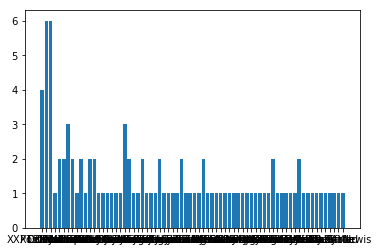

{'Drake': 4, 'XXXTENTACION': 6, 'Post Malone': 6, 'Calvin Harris': 2, 'Dua Lipa': 2, 'Marshmello': 3, 'Camila Cabello': 2, 'Maroon 5': 2, 'Kendrick Lamar': 2, 'Ariana Grande': 2, 'Ed Sheeran': 3, 'Khalid': 2, 'Clean Bandit': 2, 'Selena Gomez': 2, 'Imagine Dragons': 2, 'The Weeknd': 2, 'Migos': 2, 'Ozuna': 2}


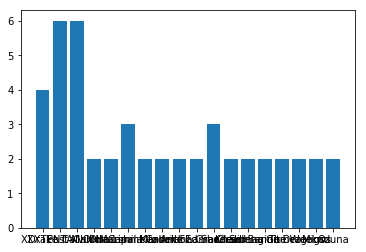

{'Drake': 4, 'XXXTENTACION': 6, 'Post Malone': 6, 'Marshmello': 3, 'Ed Sheeran': 3}


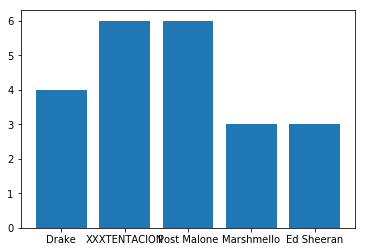

In [203]:
# We made a bar graph to show how many songs each artist had in the top 100. This bar graph turned out very crowded
print(artist_count)
pyplot.bar(range(len(artist_count)), list(artist_count.values()))
pyplot.xticks(range(len(artist_count)), list(artist_count.keys()))
pyplot.show()

# Since there were so many artists who only had one song in the top 100, we made a new, more directed dictionary that
# only includes artists who had at least 2 songs in the top 100. This makes it easier to visualize the data
artist_count2 = artist_count
for j in list(artist_count2):
    if artist_count[j] == 1:
        artist_count2.pop(j)
print(artist_count2)

pyplot.bar(range(len(artist_count2)), list(artist_count2.values()))
pyplot.xticks(range(len(artist_count2)), list(artist_count2.keys()))
pyplot.show()

# This was still a bit crowded so we made a dictionary with artists who had at least 3 songs in the top 100.
# This narrowed it down to only 5 artists 
artist_count3 = artist_count2
for j in list(artist_count3):
    if artist_count[j] == 2:
        artist_count3.pop(j)
print(artist_count3)

pyplot.bar(range(len(artist_count3)), list(artist_count3.values()))
pyplot.xticks(range(len(artist_count3)), list(artist_count3.keys()))
pyplot.show()

In [ ]:
# After creating these bar graphs, we created scatter plots to see if there is any correlation between popularity (so
# the amount times an artist appeared in the top 100) and other variables Spotify measures

# Popularity and Danceability


# Popularity and Energy


# Popularity and Speechiness


# Popularity and Acousticness


# Popularity and Instrumentalness


# Popularity and Liveness


# Popularity and Valence


# Popularity and Tempo


# Popularity and Duration_ms

